逻辑回归问题
===
对于线性回归来说，预测的变量$y$是连续变量，现在我们来讨论分类问题。分类问题与回归问题不同之处在于，$y$的取值是少量的离散值。现在，我们先介绍二元分类（binary classification），也就是$y$只能取$0$或$1$。逻辑回归的思想就是利用Sigmoid函数的阈值只能在0和1之间。

# 1.线性模型之二分类问题-逻辑回归(Logistic)
## 1.1.基本概念
0-1事件就是一个事件发生的概率只有两种可能，我们很自然的联想到使用伯努利族分布对$y$建模，那么如果我们假设1发生的概率为p，那么0发生的概率就是1-p，用一个统一个公式来表示，就是$P\{X=x\}=p^x(1-p)^{1-x}$,定义事件1发生的几率为$odds=\frac{p}{1-p}$,对数几率$z=ln(odds)$,那么可
以推导出如下公式：
$$P\{X=x\}=\frac{1}{1+e^{-z}}$$
令$\varphi = ln\frac{p}{1-p}$，有
$$\begin{eqnarray}
e^{\varphi}&=&\frac{p}{1-p}\\
&\Rightarrow& p=\frac{e^{\varphi}}{1+e^{\varphi}}\\
&\Rightarrow& p=\frac{1}{1+e^{-\varphi}}
\end{eqnarray}$$
这里我们推出了Sigmoid函数.这是因为Logistic模型对问题的前置概率估计其实就是伯努利分布。

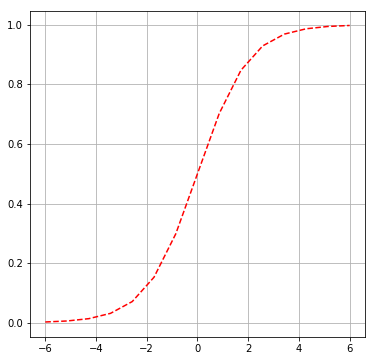

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
lineX = np.linspace(-6,6, 15)
y=1/(1+np.e**(-lineX))

plt.figure(figsize=(6,6), facecolor='white')
plt.plot(lineX, y, 'r--')
plt.grid(True)

## 1.3.Logistic公式
有
$$h_{\theta}(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$
求导有
$$\begin{eqnarray}
g'(x)&=&(\frac{1}{1+e^{-x}})'\\
&=&\frac{e^{-x}}{(1+e^{-x})^2}\\
&=&\frac{1}{1+e^{-x}} \bullet \frac{e^{-x}}{1+e^{-x}}\\
&=&\frac{1}{1+e^{-x}} \bullet (1-\frac{1}{1+e^{-x}})\\
&=&g(x) \bullet (1-g(x))
\end{eqnarray}$$

## 1.4.似然函数
假定$\begin{cases}
P(y=1|x;\theta)=h_{\theta}(x)\\\\
P(y=0|x;\theta)=1-h_{\theta}(x)
\end{cases}$，那么就有
$$p(y|x;\theta)=(h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$$
那么似然函数
$$L(\theta)=p(\overrightarrow{y}|X;\theta)=\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}$$

## 1.5.对数似然函数
$$\begin{eqnarray}
L(\theta)&=&\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}\\
&\Rightarrow& \ell(\theta)=logL(\theta)=\sum_{i=1}^my^{(i)}logh_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
\end{eqnarray}$$

## 1.6.对数似然求偏导
已知条件有：
$$\begin{cases}
h_{\theta}(x^{(i)})=g(\theta^Tx^{(i)}) &(1)\\\\
g'(z)=g(z) \bullet (1-g(z)) &(2)
\end{cases}$$
所以有:
$$\begin{eqnarray}
\frac{\partial{\ell(\theta)}}{\partial{\theta_j}}&=&\sum_{i=1}^m[y^{(i)} \bullet \frac{1}{h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}} + (1-y^{(i)}) \bullet -\frac{1}{1-h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}]\\
&=&\sum_{i=1}^m[\frac{y^{(i)}}{h_{\theta}(x^{(i)})}-\frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})}] \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}\\
&\Rightarrow& \sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet \frac{\partial{g(\theta^Tx^{(i)})}}{\partial{\theta_j}} \\
&\Rightarrow& \sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet g(\theta^Tx^{(i)}) \bullet [1-g(\theta^Tx^{(i)})] \bullet \frac{\partial{\theta^Tx^{(i)}}}{\partial{\theta_j}} \\
&\Rightarrow& \sum_{i=1}^m[y^{(i)}(1-g(\theta^Tx^{(i)})) - (1-y^{(i)})g(\theta^Tx^{(i)})] \bullet x_j^{(i)}\\
&\Rightarrow& \sum_{i=1}^m[y^{(i)} - g(\theta^Tx^{(i)})] \bullet x_j^{(i)}
\end{eqnarray}$$

## 1.7.参数学习
$$\theta_j:=\theta_j+\alpha\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x_j^{(i)}$$
有了这个，就可以进行参数学习了。

## 1.8.梯度上升法-梯度下降法的反方法

In [2]:
def Gradient_Ascent_test():
    def f_prime(x_old):                                    #f(x)的导数
        return -2 * x_old + 4
    x_old = -1                                            #初始值，给一个小于x_new的值
    x_new = 0                                            #梯度上升算法初始值，即从(0,0)开始
    alpha = 0.01                                        #步长，也就是学习速率，控制更新的幅度
    presision = 0.00000001                                #精度，也就是更新阈值
    while abs(x_new - x_old) > presision:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)            #上面提到的公式
    print(x_new)                                        #打印最终求解的极值近似值

if __name__ == '__main__':
    Gradient_Ascent_test()

1.999999515279857


## 1.9.总结
我们发现这个式子和线性回归的形式是完全一样的，如果我们定义$h_{\theta}(x)=\theta{X}$，那么就是线性回归，如果我们定义$h_{\theta}(x)=\frac{1}{1+e^{-\theta{x}}}$，那么就是logistic回归。Logistic回归中，我们假定模型服从的是二项分布，利用最大似然估计进行推导的；线性回归我们假定模型服从高斯分布，利用最大似然估计推导的；正是因为二项分布和高斯分布都是指数族分布，所以它们才能得到一样的参数学习法则其实Logistic回归是一个广义的线性模型，这是因为
$$logit(p)=log\frac{p}{1-p}=log\frac{h_{\theta}(x)}{1-h_{\theta}(x)}=log(\frac{\frac{1}{1+e^{-\theta^T{x}}}}{\frac{e^{-\theta^T{x}}}{1+e^{-\theta^T{x}}}})=loge^{-\theta^T{x}}=\theta^Tx$$

# 2.线性回归之多分类问题-Softmax回归
利用线性模型来进行多分类，就是Softmax回归

## 2.1.定义
设样本为一个m行的记录$X=\{\overrightarrow{x_1},\overrightarrow{x_2},...,\overrightarrow{x_n}\}$, 共有K的类别，那么存在这么K个$\Theta$向量$\overrightarrow{\theta_1},\overrightarrow{\theta_2},...,\overrightarrow{\theta_K}$。令$Z=\Theta^TX$，且
设$\varphi=\frac{1}{1+e^{-Z}}$，则有$\varphi=\frac{1}{1+e^{-\Theta^TX}}$
- 如果K=2，那么就是Logistic回归。分类为$y \in \{0, 1\}$，带入$\varphi$函数后，总能求的一个0~1之间的值，我们用0.5做分界点，大于0.5的就是分类1，否则就是分类0
- 如果K>2，那么就是softmax回归

## 2.2.似然函数
令$C_i=e^{\overrightarrow{\theta_i}^T\overrightarrow{x_i}}$，则第i行的概率为
$$p(c=k|x;\theta)=\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}, k=1,2,...,K$$
似然函数为
$$L(\theta)=\prod_{i=1}^m\prod_{k=1}^Kp(c=k|x^{(i)};\theta)^{y_k^{(i)}}=\prod_{i=1}^m\prod_{k=1}^K[\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}]^{y_k^{(i)}}$$

## 2.3.对数似然  
$$J_m(\theta)=lnL(\theta)=\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)} \bullet (\theta_k^Tx^{(i)}-ln\sum_{i=1}^Ke^(\theta_i^Tx^{(i)}))$$

## 2.4.损失函数
$$J(\theta)=\sum_{k=1}^Ky_k \bullet (\theta_k^Tx-ln\sum_{i=1}^Ke^{\theta_i^Tx})$$

## 2.5.随机梯度
$$\frac{\partial{J(\theta)}}{\partial{\theta_k}}=(y_k-p(y_k|x;\theta)) \bullet x$$

# 3.一般线性问题的建模过程
- 根据训练集$x^{(i)},y^{(i)}$选择概率分布模型，参数为$\phi$；
- 将该分布写为指数分布族的形式，参数为$\eta$；
- 可以得到正则响应函数$g(\eta)=\mathrm{E}[T(y);\eta]$；
- 将$\eta=\theta^Tx$带入正则响应函数得到假设函数$h_\theta(x)=g(\theta^Tx)$；
- 根据模型的概率解释得到似然函数$L(\theta)=p(y^{(i)}\mid x^{(i)};\theta)$（根据假设函数得到）；
- 取合适的$\theta$使似然函数最大化。

## 3.1.Logistic回归的一般过程
Logistic回归的一般过程：
- 收集数据：采用任意方法收集数据。
- 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
- 分析数据：采用任意方法对数据进行分析。
- 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
- 测试算法：一旦训练步骤完成，分类将会很快。
- 使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数，就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。